In [11]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


# Model Evaluation and optimization

In the steps of machine learning you:
1. take data
2. build a model
3. evaluate a model
4. optimize it
5. rebuild if needed
Then lookst at new data and the prediction

### Accuracy

Usually the main goal is to make accurate predictions. One measure of performance on a model is how well tha t5model will perform on new data. 

#### Overfitting & model optimism

#### Cross-validation

holdout method because a random subset of the training data is held out from the training process. So you use a training subset to fit the model and only the testing subset to evaluate the accuracy of the model. 

Leave out 20 - 40$ of the data as the testing subset. 



In [12]:
#make up some data
features = rand(100,5)
target = rand(100) > 0.5

In [13]:
#holdout method
N = features.shape[0]
print(N)
N_train = int(floor(0.7 * N))
print(N_train)
#do this step if you want to randomize the index
idx = random.permutation(N)


100
70


In [14]:
#split to training/test
idx_train = idx[:N_train]
idx_test = idx[N_train:]

In [15]:
#split into subsets
features_train = features[idx_train,:]
target_train = target[idx_train]
features_test = features[idx_test,:]
target_test = target[idx_test]

#Then do rest of the machine learning stuff i.e.
#model = train(features_train, target_train)
#preds_test = predict(model, features_test)
#accuracy = evaluate_accuracy(preds_test, target_test)

#### k-fold cross-validation

just like holdout you have to split subsets of training data during the learning process. The difference is k-old begins by randomly splitting the data into k disjoint subsets, called folds. Typically (5, 10, 20)

The predictions are aggregated after all the cycles have been completed. 

In [16]:
#examle
N = features.shape[0]
K = 10 #number of folds you want

preds_kfold = np.empty(N)
folds = np.random.randint(0, K, size=N)

In [17]:
for idx in np.arange(K):
    #each fold break the data into training and testin gsubsets
    features_train = features[folds != idx, :]
    target_train = target[folds != idx]
    features_test = features[folds == idx, :]
    
    print(nonzero(folds == idx)[0])
    
    #build and predict
    #model = train(features_train, target_train)
    #preds_kfold[folds == idx] = predict(model, features_test)
#accuracy = evaluate_acc(preds_kfold, target)

[ 0  8 11 22 24 54 63 69 71 82]
[ 7 19 29 39 44 47 49 51 57 76]
[21 25 42 45 56 65 85]
[15 27 31 40 41 53 61 67]
[ 2 10 17 38 43 70 84 87 98]
[33 58 59 62 64 66 74 83 88 89 91 94 95]
[ 4 12 16 20 52 68 73 77 80]
[ 3 14 32 34 60 72 81 86 90 99]
[ 1  5  6 26 30 46 48 50 55 75]
[ 9 13 18 23 28 35 36 37 78 79 92 93 96 97]


#### Cross-validation

Gives you a way to estimate how accurately your ML models will predict when deployed in the wild. Things to look out for

1. CV methods assume that the training data forms a representative smaple from the population of interest. If you plan to deploy te modle to predict on new data, that data should be well represented by the training data. if not, the cross-validation error estimates may be overly optimistic for the error rates on future data. Solution: Ensure that any potential biases in the training data are addressed and minimized. 
2. Some datasets use features that are temporal-- for instance, using last month's revenue to forecast this month's revenue. If this is the case with your data, you must ensure that features that are available in the future can never be used to predict the past. Solution: you can structure your cross-validation holdout set or k-folds so that all the training set data is collected previous to the testing set. 
The larger the number of folds used in k-fold the better the error estimates will be, but the longer your program will take to run. Solution: use at least 10 folds (or more) when you can. For modles that train and predict quickly, you can use leave-one-out CV (k = number of data instances)

#### Confusion-Matrix

When checking accuracy of aclassifier it may be a good estimate of accuracy by getting a percentage of items classified properly BY class. A confusion matrix could help visualize this. 

i.e. 

2/3 correct as 1
1 of 1 correct as 0
1 of 3 false as 0
0 of 1 false as 1

This then shows the class wide accuracy between ture positive rate, false positive rate, false negative rate and true negative rate. 

#### ROC curves
receiver operating characteristics

In [30]:
#roc curve
def roc_curve(true_labels, predicted_probs, n_points=100, pos_class=1):
    thr = np.linspace(0,1, n_points)
    tpr = zeros(n_points)
    fpr = zeros(n_points)
    
    pos = true_labels == pos_class
    neg = logical_not(pos)
    n_pos = count_nonzero(pos)
    n_neg = count_nonzero(neg)
    
    for i, t in enumerate(thr):
        tpr[i] = count_nonzero(logical_and(predicted_probs >= t, pos)) / n_pos
        fpr[i] = count_nonzero(logical_and(predicted_probs >= t, neg)) / n_neg
    return fpr, tpr, thr

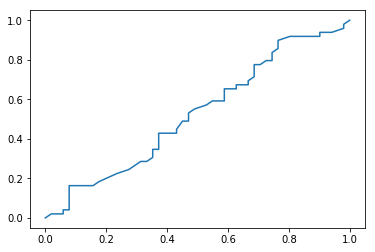

In [31]:
#rando generated predictions should give us a roc curve
preds = rand(len(target))
fpr, tpr, thr = roc_curve(target, preds, pos_class=True)
plot(fpr, tpr)